In [114]:
import matplotlib.pyplot as plt
import numpy as np

def LUmine(A):
    n = A.shape[0]
    L = np.matrix( np.identity(n) )
    U = A
    for j in range(0,n-1):
        for i in range(j+1,n):
            mult = A[i,j] / A[j,j]
            A[i, j+1:n] = A[i, j+1:n] - mult * A[j, j+1:n]
            U[i, j+1:n] = A[i, j+1:n]
            L[i,j] = mult
            U[i,j] = 0
    return L, U

def QRmine(A):
    n = A.shape[0]
    Q = np.matrix( np.zeros( (n,n) ) )
    for j in range(0, n):
        q = A[:,j]
        q = q.reshape((n,1))
        for i in range(0, j):
            length_of_leg = np.sum( A[:,j].T * Q[:,i])
            q = q - length_of_leg * Q[:,i]
        Q[:,j] = q / np.linalg.norm(q)
    R = Q.T * A
    return Q, R

In [115]:
#Ερώτημα (α)
def Hilbert(n):
    H = np.matrix( np.zeros( (n,n) ) )
    for i in range(0,n):
        for j in range(0,n):
            H[i,j] = 1 / (i + j + 1)
    return H

In [116]:
def LUsolve(A, b):
    LU = LUmine(A)
    L = LU[0]
    U = LU[1]
    n = b.shape[0]
    y = np.matrix( np.ones(n) ).reshape((n,1))
    x = np.matrix( np.ones(n) ).reshape((n,1))

    for i in range(n):
        y[i] = (b[i] - np.sum(L[i,:i] * y[:i])) / L[i,i]

    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.sum(U[i,i+1:] * x[i+1:])) / U[i,i]
        
    return x

def QRsolve(A, b):
    QR = QRmine(A)
    Q = QR[0]
    R = QR[1]
    n = b.shape[0]
    b = b.reshape((n,1))

    y = Q.T.dot(b)
    x = np.matrix( np.ones(n) ).reshape((n,1))

    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.sum(R[i,i+1:] * x[i+1:])) / R[i,i]

    return x

In [117]:
#Ερώτημα (β)
n = 4
Hil = Hilbert(n)
b = np.ones((n, 1))

solution1 = QRsolve(Hil, b)
print(solution1)
print(Hil * solution1)

solution2 = LUsolve(Hil.copy(), b)
print(solution2)
print(Hil * solution2)

[[  -3.99999998]
 [  59.99999978]
 [-179.99999947]
 [ 139.99999966]]
[[1.]
 [1.]
 [1.]
 [1.]]
[[  -4.]
 [  60.]
 [-180.]
 [ 140.]]
[[1.]
 [1.]
 [1.]
 [1.]]


In [118]:
#Ερώτημα (γ)
n = 5
Hil = Hilbert(n)
b = np.ones((n, 1))

bNew = b + 1e-15

x = QRsolve(Hil, b)
xnew = QRsolve(Hil, bNew)

diff = np.max(np.abs(x - xnew))
print(diff)

4.320099833421409e-12


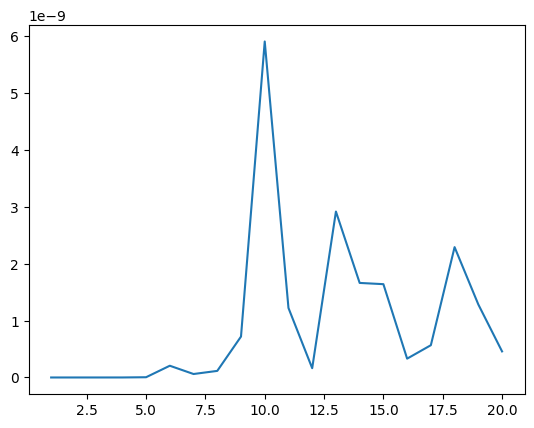

In [119]:
#Ερώτημα (δ)
def calculateDiff(n):
    Hil = Hilbert(n)
    b = np.ones((n, 1))
    bNew = b + 1e-15
    x = QRsolve(Hil, b)
    xnew = QRsolve(Hil, bNew)

    diff = np.max(np.abs(x - xnew))
    return diff

def plotDiff(n):
    xpoints = np.array([i for i in range(1, n+1)])

    ypoints = np.ones((n, 1))
    for i in range(1,n+1):
        ypoints[i-1] = calculateDiff(i)
    #print(ypoints)

    plt.plot(xpoints, ypoints)
    plt.show()

plotDiff(20)

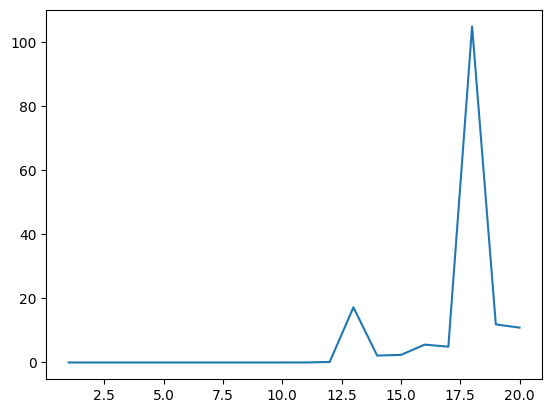

In [120]:
#Ερώτημα 5
def calculateNorm(n):
    Hil = Hilbert(n)
    InvHil = np.linalg.inv(Hil)

    norm2 = np.linalg.norm(np.identity(n) - Hil * InvHil)
    return norm2


def plotNorms(n):
    xpoints = np.array([i for i in range(1, n+1)])

    ypoints = np.ones((n, 1))
    for i in range(1,n+1):
        ypoints[i-1] = calculateNorm(i)

    plt.plot(xpoints, ypoints)
    plt.show()

plotNorms(20)

In [121]:
#Πρόβλημα Προσέγγισης
def calculate_T_values(min, max, points):
    T = np.empty(points)
    h = (max - min) / points

    for i in range(points):
        T[i] = min + h * i

    return T

def calculate_Y_values(T):
    Y = np.empty(T.shape[0])

    Y[:] = np.cos(4 * T[:]) + 0.1 * np.random.randn(T.shape[0])
    return Y

def solveLeastSquares(T, Y, grade):
    A = np.ones((T.shape[0] , grade))

    for j in range(1, grade):
        A[:, j] = T[:] ** j

    x1 = QRsolve(A.T.dot(A), A.T.dot(Y))
    x2 = LUsolve(A.T.dot(A), A.T.dot(Y))

    print("polynomial with QR:")
    print(x1)

    print("polynomial with LU:")
    print(x2)

    return A, x1, x2

def leastSquaresError(A, x1, x2, Y):
    r1 = Y - A.dot(x1)
    r2 = Y - A.dot(x2)

    r1 = np.linalg.norm(r1)
    r2 = np.linalg.norm(r2)

    print("Least Squares error with QR:", r1)
    print("Least Squares error with LU:", r2)

def plotApproximation(T, Y, x1, x2):
    plt.plot(T, Y, color = 'r', label='y(t)')
    
    x = np.linspace(0,1,100) #100 points in the space [0,1] (for plotting the polynomials)
    y1 = [np.polyval(np.flip(x1), i) for i in x]
    plt.plot(x, y1, color = 'b', label='p1(t)')

    y2 = [np.polyval(np.flip(x2), i) for i in x]
    plt.plot(x, y2, color = 'g', label='p2(t)')
    
    plt.show()

polynomial with QR:
[[ 1.03345755]
 [-0.6664068 ]
 [-7.33412672]
 [ 6.26366702]]
polynomial with LU:
[[ 1.03345755]
 [-0.66640679]
 [-7.33412674]
 [ 6.26366704]]
Least Squares error with QR: 50.905009706708825
Least Squares error with LU: 50.90500970799726


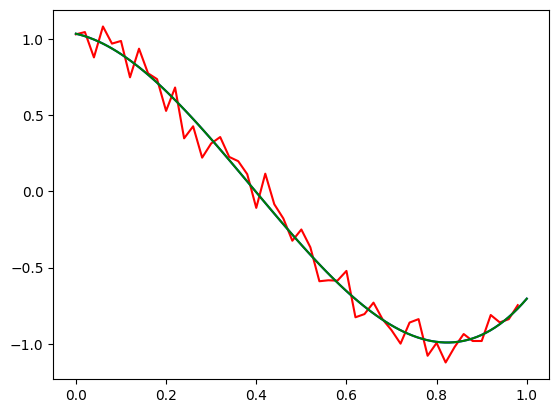

In [127]:
T = calculate_T_values(0, 1, 50)
Y = calculate_Y_values(T)
A_and_solution = solveLeastSquares(T, Y, 4)
R = leastSquaresError(A_and_solution[0], A_and_solution[1], A_and_solution[2], Y)
plotApproximation(T, Y, A_and_solution[1], A_and_solution[2])